# Documenting my Life Using Life Cycle
Alicia Domingo

## Importing Necessary Libraries
In order to analyze the data for the life cycle app, there are several libraries that need to be imported such as:
* `utils`: the python file with the functions being used
* `pandas as pd`: a software library in python for data manipulation and analysis
* `matplotlib.pyplot as plt`: to create charts based off of the data collected
* `from scipy import stats`: for hypothesis testing and confidence intervals

In [1182]:
import pandas as pd
import matplotlib.pyplot as plt

`import importlib` and `importlib.reload(utils)` are used so I don't have to restart the kernal for the notebook every single time I edit the `utils.py` file.

In [1183]:
import utils
import importlib
importlib.reload(utils)

<module 'utils' from '/Users/aliciadomingo/Documents/CPSC222/final_github/utils.py'>

### Scikit-Learn Library
The scikit-learn library is a machine learning library that features classification, regression, and clustering algorithms
* `from sklearn import preprocessing`
    * provides common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.
* `from sklearn.model_selection import train_test_split`
    * Quick utility that wraps input validation and application to input data into a single call for splitting (and optionally subsampling) data into a one-liner
* `from sklearn.metrics import accuracy_score`
    * computes accuracy classification score
* `from sklearn.neighbors import KNeighborsClassifier`
    * Classifier implementing the k-nearest neighbors vote
* `from sklearn.tree import DecisionTreeClassifier`
    * function to measure the quality of a split

## Background
In the year 2017, my freshmen year of high school, I discovered an app on the app store called **Life Cycle**, which tracks the amount of hours you spend doing certain activities. Overtime the app learns your location and what label it should be under. The app has it split into days, week, months, years. Every single year I always look forward to my new graph of all the things I did in the year. There is very interesting data, especially for the year 2020, since that was not a normal year for anyone. The year 2020 is very unique compared to the other years. The dataset format is a csv file named **project_life_cycle.csv**. The potential impacts of these results could result in someone being able to track where I would go depending on the day and time of day. You can learn a lot about someone just based on the places that we go to. The potential stakeholders in this project would be companies interested how people move to different locations based on different days,times,months, and years. I remember in grade school how we would study how native americans would move over the year to find a place that was just right for them. This would all depend on weather and the surrounding land. Since humans nowadays are very stationary people, the stakeholders can learn the relative time we leave for school/work every morning and predict what we would do on the weekends.

For more information on the app click [here](https://northcube.com/lifecycle/press/introducing-life-cycle-new-app-tracks-time-life-automatically/)

The picture below is an example of what the app may look like for the month. It is bascially a pie chart. If I wanted to, I could try to recreate this using `plt.pie()`, but it wouldn't look as nice as it does in the app.

<img src="https://northcube.com/lifecycle/wp-content/uploads/2016/09/photo_phone_4.png" width="300"/>


## Reading the File
The following data in the csv file is originally going to be loaded with the colunms:
* START DATE(UTC)
    * In order for the data to stay consistent, all the times and days are converted to a standard time
* END DATE(UTC)
* START TIME(LOCAL)
    * Since I do travel a lot, the local time changes a lot. I'm from a region where we use Mountain time, but here in Spokane we use Pacific Time zone
* END TIME(LOCAL)
* DURATION (in seconds)
* NAME (the type of activity)
    * This category could include sleep, school, transport, groceries, and going to breakfast, lunch or dinner
* LOCATION
    * This is the specific location of where I did the type of activity. For example the location Safeway would be under groceries and the location Chipotle could be under the name lunch or dinner
* NOTE
    * this column is there just in case I had any notes to say about that day or event
* BLANK 
    * there was a random column that came in the file that I manually named **BLANK**

Using the `pandas` library, we are able to read the csv file and put into a dataframe. The `pandas` library includes a lot of resources in order to clean the data and being able to display **csv** files. I used `pd.read_csv("project_life_cycle")` to read the file necessary for this project.

In [1184]:
df = pd.read_csv("project_life_cycle.csv")
df1 = pd.read_csv("Days_of_Week.csv")

## Cleaning the Data
Cleaning data is very necessary when it comes to data science becomes this is the first step before a person analyze the data and visualize it too. A majority of data scientists spend their time cleaning their data, instead of collecting and interpreting the data. This is a very important step.

### Converting Seconds to Hours
Initially the data in the csv file for **duration** is all being displayed in seconds. To clean the data, I converted all the duration times into hours to make it easier to understand. Most people can't comprehend how long a certain amount of seconds are, compared to hours, which is easier to read.

The utility function called `utils.second_to_hours(df)` is used by grabbing the **DURATION** column and then using a for loop to read every line of that column, converting the time from seconds to hours.

In [1185]:
utils.seconds_to_hours(df)

/Users/aliciadomingo/Documents/CPSC222/final_github/utils.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_col[i] = duration_col[i]/3600


### Cleaning the Columns with Date and Time
In the orginal csv file, the date was formatted very weird and it was hard to have it all standardized. I used `pd.to_datetime` to formal it so the colunns **Start Date (UTC)** and **End Date (UTC)** are all the same and it doesn't include the time. If it had the time, it would be harder to use the *split, apply, and combine method* that we have been practicing all semester. The function that is from `utils.py` is used for this and is called `convert_date_to_std`, with the input being the dataframe produced from reading the **csv** file.

In [1186]:
utils.convert_date_to_std(df)

### Challenges with Data Cleaning
The one challenge that I experienced when I was doing data preparation and cleaning was knowing how to clean the Time column. The time column was very difficult because it was not only given the date that this certain activity was done, but also the time. I needed to removed the time part of the data in order to continue on with the rest of the project. I looked online to help me find the best way to clean that column.

### Getting Rid of the Unneccesary Columns
In order to get rid of unnecessary columns, I use `df.drop` with the axis remaining 1. This is how I handled missing values in my dataset.

In the original csv file, there were unnecessary colummns such as:
* Start Time (Local)
* End Time (Local)
    * There were four columns in total that contained dates and times. I decided to use the **UTC** verson of the dates because the days would remain constant. If I used the local, since I have traveled all around the world, some of the dates and times would not make sense
* End Date (UTC)
    * Only need the start time for my graphs, hypothesis testing, and classification
* Location
    * Location is not useful since I have been to maybe 100s of different locations over the years. It would be hard to read this data and it will probably not be useful in the end anyways.
* Note
    * I didn't take any notes while using this app, but this column would not be useful anyways since there is no numerical or categorical aspect of this column
* Blank
    * There was just an empty column that I had to maually name **BLANK** in the file and then got rid of it in the data frame

In [1187]:
df = df.drop(["END DATE(UTC)","START TIME(LOCAL)","END TIME(LOCAL)","LOCATION","NOTE","BLANK"],axis=1)

### Putting the Cleaned CSV file into a New File
I used `to_csv` from the `pandas` library to put the dataframe that had been cleaned into a file called **project_cleaned.csv**

In [1188]:
df.to_csv("project_cleaned.csv")

## Visualizations

### Pie Chart
The pie chart below shows all the places I have been to in the last five years. As you can see a majority of that time was spent at home or sleeping. This makes sense because since I started this data when I was a freshman in high school, college and dorm life is a small percentage of that data. I have read that you spend $\frac{1}{3}$ of your life in bed and this pie chart for **sleep** is about $\frac{1}{3}$.

To make this pie chart, I used the `import matplotlib.pyplot as plt` library. In order to group the pie chart into the necessary categories, I used `groupby` and then `sum()` to get the total duration for each group. I then sorted the values in ascending order using `sort_values` and converted the series back to a 1D dataframe using `to_frame`. I used `plt.pie()` to make the chart. Since there were some values that were so small that you could not seee it in the pie chart, I only tried to get the data points that I spent 250 hours or more.

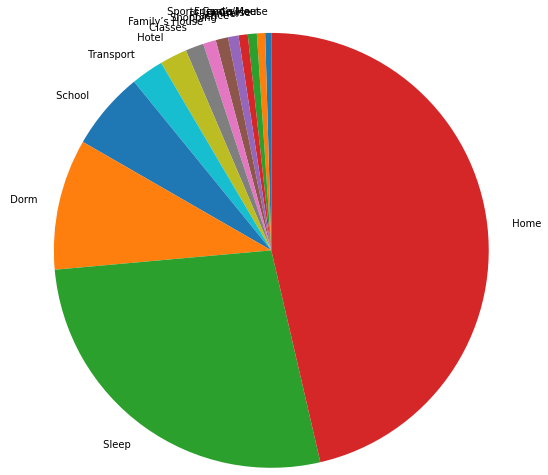

In [1189]:
utils.overall_pie(df)

### Bar Chart of Time Spent Home from 2018 to 2021
The data from the time spent from home excludes the time spent sleeping, since that is another major category in itself. I wanted to visualize the time spent at home because it can predict when I went on vacation, since I was gone for an extended period of time, and when I went to college. The function from `utils.py` called `time_spent_home_bar` was used to visualize this data. The input of these functions were the dataframe that had been cleaned before, the lines in the dataframe for each year (start and finish), and the year itself. The year was used in the title, using `plt.title()`, and for the x-axis label, using `plt.xlabel()`. Since putting the year 2018, 2019, 2020, etc is considered a integer when it is inputed in the function, I have to use `str()` to convert it to a string, so I could add it to the title and x-axis. I use the **split, apply, and combine** to only grab the data from that specific year, only for time spent at home. After making a new dataframe with just the data from *home*, I grab the **START DATE (UTC)** and **DURATION** columns. The duration column because the labels for the x-axis and the duration column becomes the data for the bar chart. I also print the average time spent at home.

### Basic Formulas
Average: $m = \frac{\sum{n}}{n}$

#### 2018
Nothing too interesting about 2018, but you can see the times when I went on vacation because there is a drop in the time I spent at home.

Average: 9.369927576090934


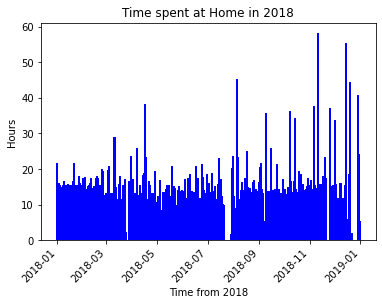

In [1190]:
utils.time_spent_home_bar(df,552,4477,2018)

#### 2019
There is a slight break that I am not home. This could have been during the summer when I went on my cruise. There is also another break in the December months when I first visited Gonzaga.

Average: 11.074510331014125


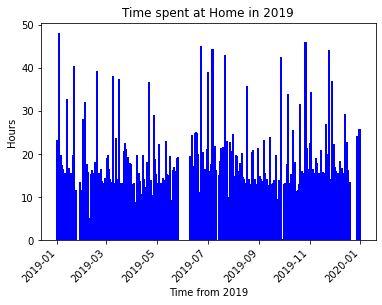

In [1191]:
utils.time_spent_home_bar(df,4479,8207,2019)

#### 2020
The year 2020 is the most interesting because this was the year of COVID. You can tell when the pandemic initially started, in March 2020, and how it slowly went back to normal. There is a small spike around November of 2020 because I vividly remember that being the time when our school had to go into quarintine again because a big portion of the school had COVID.

Average: 17.128471879286693


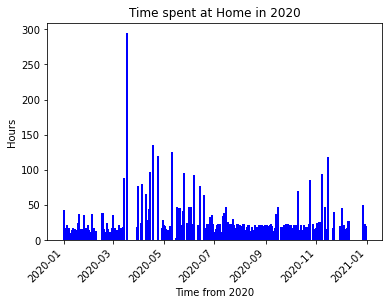

In [1192]:
utils.time_spent_home_bar(df,8209,11047,2020)

#### 2021
In the graph, you notice when I started homework and all the times I went home, which mostly included Thanksgiving and Christmas

Average: 12.238127125850344


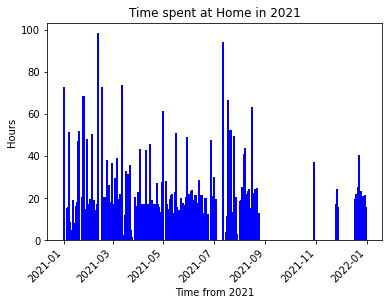

In [1193]:
utils.time_spent_home_bar(df,11049,14634,2021)

#### 2022
The year 2022 is a better representation of when I went to college because you notice the time I went home for the summer compared to the Spring 2022 and Fall 2022 semesters. Of course this graph is not complete because it doesn't include winter break, but it has the majority of the year. You can see spikes that I am home during spring break and easter.

Average: 19.926633597883594


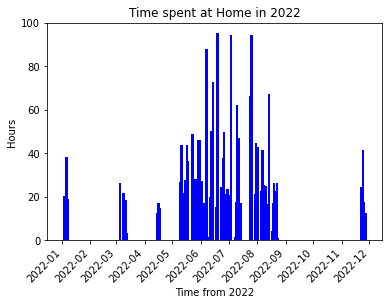

In [1194]:
utils.time_spent_home_bar(df,14636,17930,2022)

### Bar Chart of Time Spent at Home Each Day of the Week
Based on this bar chart, I can visualize that I spend more time on home during the weekends compared to the weekdays

                    DURATION
DAY OF THE WEEK             
Friday           3870.664722
Monday           3764.291111
Saturday         3997.844444
Sunday           3989.070833
Thursday         3771.922222
Tuesday          3679.796111
Wednesday        3423.899167


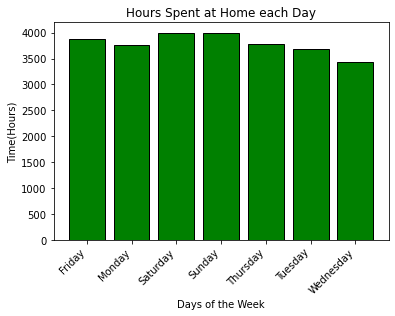

In [1195]:
merged_df = utils.merge_files(df,df1)
print(merged_df)
utils.visualize_merge(merged_df)

## Hypothesis Testing
### Getting Necessary Data

The function called `time_spent_sleep()` from the `utils.py` file is used to grab the average sleep for certain months in order to see calcuate the average and standard deviation. This is done by using the **split, apply, and combine** method, as used in the visualization of time spent at home, and then grabbing the **DURATION** column.

### Visualizing Sleep
To visualize the data for the time I spent sleeping in the month of June and September, I made a bar char using the `matplotlib.pyplot as plt` library,with `plt.bar()`. I also wanted to print the average sleep and standard deviation for each month by using `mean()` and `std()`. I was able to accomplish this by grabbing the **DURATION** and the **START DATE (UTC)** column. The date column became the labels and the duration became the labels. For labeling the graph, `plt.xlabel()`, `plt.ylabel`, and `plt.title()` were used. Before I used `plt.xticks()` the labels for the dates were all overlapping each other. By using this feature in the **matplotlib.pyplot** library, I was able to angle them at 45 degrees.

### Basic Formulas
Average: $m = \frac{\sum{n}}{n}$

Standard Deviation: $\sigma = \sqrt{\frac{\sum(x_i - \mu)^2}{N}}$

Average Sleep in June 8.892694444444446
Standard Deviation in June 0.8521702634370284


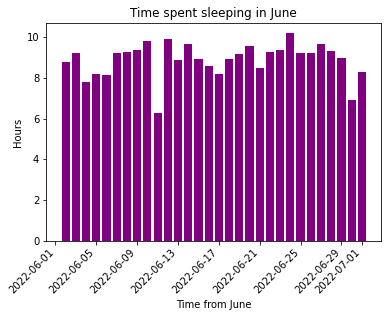

In [1196]:
utils.visualize_sleep(df,16119,16272,"June")

Average Sleep in September 8.752814814814817
Standard Deviation in September 1.0062556931910827


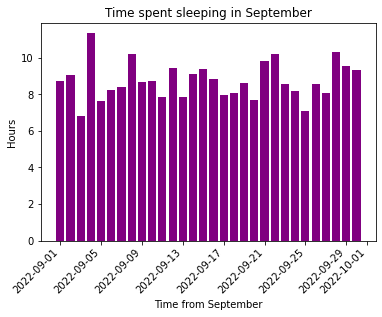

In [1197]:
utils.visualize_sleep(df,16759,17172,"September")

As you can see with the average sleep for the month of June 2022 and the month of 2022, the amount of sleep is about the same. I slightly got more sleep during the summer as compared to the month of September, but my sleep varies a lot more during the school year. This could be due to the fact that my schedule is different for every single day. Meaning I could get more sleep the night before during my Tuesday and Thursday classes, compared to my Monday, Wednesday, Friday classes.

### Going through stages of Hypothesis Testing

I want to predict that ever since college started, compared to my sleep in the summer of 2022, that I have gotten less sleep. Less sleep could be caused by the amount of work that I have to put in college, compared to when I am very relaxed at home during the summer. I am going to use a significance level of 0.005.

There are five steps when doing hypothesis testing, which include:
1. Identify the "null" ($H_0$) and "alternative" hypothesis ($H_1$)
1. Select the Level of Significance
1. Select the appropriate test statistic
1. Formulate the Decision Rule
1. Make a Decision

#### 1. Identify the "null" ($H_0$) and "alternative" hypothesis ($H_1$)
$H_0: \mu_{june} \geq \mu_{september}$  
$H_1: \mu_{june} < \mu_{september}$

#### 2. Select the Level of Signigicance
$\alpha = 0.005$

I chose 0.005 as the life of significance since the time I spent sleeping in June was not too different to the time I spend sleeping in September. I wanted to see if I could prove that I got more sleep during the summer.

In [1198]:
alpha = 0.005

#### 3. Select the appropriate test statistic
Dependent two-sample test:  
$t=\frac{\overline{d} - \mu_d}{s_{\overline{d}}}$   

$\mu_d$ = population mean difference  
$s_d$ = sample standard deviation

This is a dependent two-sample test because I am comparing data from me from two different months. All the hypothesis testing should be dependent since the data is all coming from one source.

#### 4. Formulate the Decision Rule
T-critical was found by using the t-table, and then taking the level of significance and degrees of freedom. Degrees of freedom was calculated by the length of the June dataframe and the length of the September dataframe minue 2.

In [1199]:
utils.hypothesis_testing(df,alpha)

Degrees of Freedom: 58
T-critical: 2.666
do not reject H0


#### 5. Make a Decision
Based on the data, I cannot claim that I do get more sleep during the summer, compared to the school year. I assumed this would be the case since my sleep is about the same during the school year compared to during the summer. If I compared this for my sleep during the school year in college versus my sleep during the summer, my hypothesis might have been rejected.

## Classification
For Classification, I am trying to predict how likely it is for me to do certain activities depending on the date and duration.

### More Cleaning for Classification
Converting the date column into a string, then removing the "-" with `replace()` so it can become a string with all numbers. Finally, I convert that string to an integer, so it could be used for classification. A string that has numbers or an integer is required for classification.

In [1200]:
utils.replace_date(df)

Since the column with **NAME** was all categorical, I had to convert those to numbers using `from sklearn import preprocessing` and the `LableEncoder()`.

In [1201]:
utils.categorical_to_numeric(df)

After cleaning the data for a second time for classification, I put this new dataframe into a new csv called **project_knn.csv** using `to_csv()`.

### Splitting Data into Train and Test
I used the *holdout method* to get a certain percentage of instances for testing and for the remaing instances, those become the train. With the `train_test_split()`, the default reserves 25% for testing and 75% for training. The `random_state` was set to 0, to gurantee that I get the same data for every single time I run the code. For the function I return **X_train**, **X_test**, **y_train**, and **y_test** to be used for the other classifier models. **X** is a feature matrix that has instances and **y** is a class vector and the thing that we are trying to predict.

In [1202]:
tts = utils.for_train_test_split(df)

### K Neighbors Classifier
The K Nearest Neighbors Classifier is to predict accuracy of the machine learning. To avoid an inadvertent weighting of our attributes when we use this formula, we typically apply a preprocessing step called normalization, by using `fit()` and `transform()`. To get the accuracy between 0 and 1, I used `score()`. As you can see the accuracy is not too good. KNN is not a very efficient algorithm.

In [1203]:
utils.accuracy(df)

accuracy: 0.42014534392428593
[58 38 67 ... 64 64 10]
accuracy: 0.42014534392428593


### Decision Tree Classifier
The Decision tree classifier is a more efficient algorithm, compared to the K Neighbors Classifier because the accuracy is slightly higher. I took the function called `for_train_test_split()` to grab the necessary information to predict. `fit()` and `score()` were used to get the accuracy.

accuracy: 0.44245394625654894


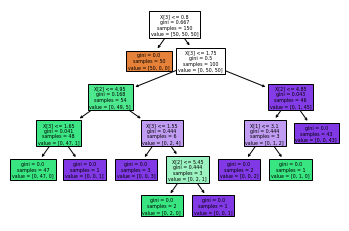

In [1204]:
utils.tree_class(df)

### Challenges with Classification
The challenges with classification, especially with this data set is that I don't think either algorithm can fully predict how humans move from place to place and when they would be at certain places. That is probably why the accuracy score for both classifiers is so low.

## Conclusion
### Summary
The dataset that I used, I will continue to log information to see how much my lifestyle has changed over the years. Seeing how much my life has changed in the past 5 years of using this app, I am exicited to see what it would actually be like when I finally settle in and start my first job after college. This dataset is very important to me because sometimes when I forget when I went on vacation or did a certain activity, I can still find when I did that activity to the exact day and time of year.

### Classification Approach
The classification approach that I developed was not very accurate at all. If I was going to continue on with this assignment, I would want to try to find a way to make the algorithm better, to make it even more accurate. I don't really think there is any way to improve the accuracy of the classifier because a computer can never fully predict how a human would react and what they will do. I lives are always very different every single day. I feel like our weekdays are the most set, since we always go to work/school. But, maybe on the weekday, we could decided to go out for dinner or stay in. Weekends are always so unpredictable because we as humans never do the same thing twice, unless maybe if the user goes to church every single Sunday. In order for this classifier to become more accurate, humans almost have to act like robots, doing the same thing at the same time every single day.

### Potential Impacts
The ethical impacts behind somebody being able to predict where and when I would be at certain locations seems wrong. The life cycle app is meant for personal use, just for the user to remember all the places that they have been over the days,weeks,months, and years. If every single person had the life cycle app, I think the ethical impacts would be greater. I think personally, apps like twitter, facebook, instagram, and snapchat tracking all our data is crossing the line. If a company or person knows every single location that we could possibly be in, it could be dangerous for the user. If this information got into the wrong hands, that would also be dangerous.